# Fighting Novel Coronavirus COVID-19 with Data Science & Machine Learning.

*By: Ahmed A.Azeem (Biomedical Engineer), Cairo, Egypt.
email: eng.aa.azeem80@outlook.com*

## Abstract

In December 2019, A novel Coronavirus was found in a seafood wholesale market located in Wuhan, China., On 11 February 2020, WHO announced a name for the new coronavirus disease: COVID-19., And was recognised as a pandemic on 11 March 2020.

Coronavirus disease 2019 (COVID-19) is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) a virus closely related to the SARS virus., The disease was discovered and named during the 2019–20 coronavirus outbreak, Those affected may develop a fever, dry cough, fatigue, and shortness of breath. A sore throat, runny nose or sneezing is less common. While the majority of cases result in mild symptoms, some can progress to pneumonia and multi-organ failure.

For more information & sources of trusted data:

- https://en.wikipedia.org/wiki/Coronavirus_disease_2019
- https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- https://www.cdc.gov/coronavirus/2019-ncov/index.html
- https://www.ecdc.europa.eu/en/novel-coronavirus-china
- https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
- https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
- https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

#### Methodology / Approach
CRISP-DM used as a data science methodology.

For more information:

- IBM https://www.ibmbigdatahub.com/blog/why-we-need-methodology-data-science
- IBM https://www.ibm.com/support/knowledgecenter/SS3RA7_15.0.0/com.ibm.spss.crispdm.help/crisp_overview.htm

- Intel® Data Analytics Acceleration Library (Intel® DAAL) Developer Guide (https://software.intel.com/sites/default/files/daal-developer-guide-2020-u1.pdf)

- Microsoft https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/overview

- CRISP-DM consists of six iterative stages.

  1. **Business Understanding**: Focuses on understanding the project objectives and requirements from a business perspective, and then converting this knowledge into a data mining problem definition and a preliminary plan.
  
  2. **Data Understanding**: Starts with initial data collection and proceeds with activities to get familiar with the data, identify data quality problems, discover first insights into the data, or detect interesting subsets to form hypotheses for hidden information.
  
  3. **Data Preparation**: The data preparation phase covers all activities to construct the final data set from the initial raw data.
  
  4. **Modeling**: Modeling techniques are selected and applied. Because some techniques like neural networks (a type of a predictive model) have specific requirements regarding the form of the data, there can be a loop back to data preparation.
  
  5. **Evaluation**: After one or more models are built that appear to have high quality based on whatever we are trying to predict, they need to be tested to ensure that they work against unseen data and that all key business issues are sufficiently considered. The result is the selection of the champion model.
  
  6. **Deployment**: Generally, deployment means deploying a code representation of the model into an operating system to score or categorize new unseen data as it arises and create a mechanism for the use of that new information in the solution of the original business problem. Importantly, the code representation must include all the data preparation steps leading up to modeling so that the model treats new raw data in the same manner as during model development.

### Dataset Source

*European Centre for Disease Prevention and Control*

Situation update worldwide, as of 14 Jan. 2021. (The data has been collected between 6:00 and 10:00 CET)

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

%matplotlib inline

In [2]:
#last updated dataset
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
#url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/xlsx'

In [3]:
import urllib.request
urllib.request.urlretrieve (url, "covid_state_2021.csv")

('covid_state_2021.csv', <http.client.HTTPMessage at 0x7f111da864d0>)

In [4]:
# Get data from European Centre for Disease Prevention and Control
covid_df = pd.read_csv('covid_state_2021.csv')

In [5]:
covid_df.head()

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15
1,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
2,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
3,21/12/2020,2020-51,740,111,Afghanistan,AF,AFG,38041757.0,Asia,6.56
4,14/12/2020,2020-50,1757,71,Afghanistan,AF,AFG,38041757.0,Asia,9.01


In [6]:
covid_df['dateRep'] = pd.to_datetime(covid_df['dateRep'], format='%d/%m/%Y')

In [7]:
covid_df.isna().sum()[covid_df.isna().sum()>0]

geoId                                               44
countryterritoryCode                                22
popData2019                                         22
notification_rate_per_100000_population_14-days    235
dtype: int64

In [8]:
covid_df.dtypes

dateRep                                            datetime64[ns]
year_week                                                  object
cases_weekly                                                int64
deaths_weekly                                               int64
countriesAndTerritories                                    object
geoId                                                      object
countryterritoryCode                                       object
popData2019                                               float64
continentExp                                               object
notification_rate_per_100000_population_14-days           float64
dtype: object

In [9]:
covid_df.rename(columns={'dateRep': 'Date', 'countriesAndTerritories': 'Country', 'cases_weekly': 'Confirmed','deaths_weekly': 'Deaths', 'continentExp': 'Continent'}, inplace=True)

In [10]:
covid_df.drop(['geoId', 'year_week', 'countryterritoryCode', 'popData2019', 'countryterritoryCode','notification_rate_per_100000_population_14-days' ], axis=1, inplace=True)

In [11]:
covid_df.to_csv('jan2021_updated.csv')

In [12]:
ndf = pd.read_csv('jan2021_updated.csv',parse_dates=['Date'], index_col='Date')
ndf.head()

,Unnamed: 0,Confirmed,Deaths,Country,Continent
Date,,,,,
2021-01-11,0,675,71,Afghanistan,Asia
2021-01-04,1,902,60,Afghanistan,Asia
2020-12-28,2,1994,88,Afghanistan,Asia
2020-12-21,3,740,111,Afghanistan,Asia
2020-12-14,4,1757,71,Afghanistan,Asia


In [13]:
drop_these = ['Unnamed: 0']
ndf = ndf.drop(columns=drop_these, axis=1)

In [14]:
ndf.to_csv('new_df_2021.csv')

In [15]:
jdf = pd.read_csv('new_df_2021.csv',parse_dates=['Date'], index_col='Date')
jdf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2021-01-11,675,71,Afghanistan,Asia
2021-01-04,902,60,Afghanistan,Asia
2020-12-28,1994,88,Afghanistan,Asia
2020-12-21,740,111,Afghanistan,Asia
2020-12-14,1757,71,Afghanistan,Asia


In [16]:
# Rename Countries
jdf['Country']= jdf['Country'].str.replace('Antigua_and_Barbuda','Antigua & Barbuda')
jdf['Country']= jdf['Country'].str.replace('United_Kingdom', 'UK')
jdf['Country']= jdf['Country'].str.replace('United_States_of_America', 'US')
jdf['Country']= jdf['Country'].str.replace('United_Arab_Emirates', 'Emirates')
jdf['Country']= jdf['Country'].str.replace('Holy_See', 'Vatican')
jdf['Country']= jdf['Country'].str.replace('Bosnia_and_Herzegovina','Bosnia & Herzegovina')
jdf['Country']= jdf['Country'].str.replace('Brunei_Darussalam','Brunei')
jdf['Country']= jdf['Country'].str.replace('Burkina_Faso','Burkina Faso')
jdf['Country']= jdf['Country'].str.replace('CANADA','Canada')
jdf['Country']= jdf['Country'].str.replace('Cases_on_an_international_conveyance_Japan','The Diamond Princess')
jdf['Country']= jdf['Country'].str.replace('Central_African_Republic','Central African Rep.')
jdf['Country']= jdf['Country'].str.replace('Costa_Rica','Costa Rica')
jdf['Country']= jdf['Country'].str.replace("Cote_dIvoire","Cote d'ivoire")
jdf['Country']= jdf['Country'].str.replace('Czech_Republic','Czech Rep.')
jdf['Country']= jdf['Country'].str.replace('Democratic_Republic_of_the_Congo','Congo-Kinshasa')
jdf['Country']= jdf['Country'].str.replace('Equatorial_Guinea','Guinea')
jdf['Country']= jdf['Country'].str.replace('Eswatini','Eswatini-Swaziland')
jdf['Country']= jdf['Country'].str.replace('New_Zealand','New Zealand')
jdf['Country']= jdf['Country'].str.replace('North_Macedonia','Macedonia')
jdf['Country']= jdf['Country'].str.replace('Saint_Lucia','Saint Lucia')
jdf['Country']= jdf['Country'].str.replace('Saint_Vincent_and_the_Grenadines','Saint Vincent')
jdf['Country']= jdf['Country'].str.replace('San_Marino','San Marino')
jdf['Country']= jdf['Country'].str.replace('Saudi_Arabia','Saudi Arabia')
jdf['Country']= jdf['Country'].str.replace('South_Africa','South Africa')
jdf['Country']= jdf['Country'].str.replace('South_Korea','South Korea')
jdf['Country']= jdf['Country'].str.replace('Sri_Lanka','Sri Lanka')
jdf['Country']= jdf['Country'].str.replace('Trinidad_and_Tobago','Trinidad & Tobago')
jdf['Country']= jdf['Country'].str.replace('United_Republic_of_Tanzania','Tanzania')
jdf['Country']= jdf['Country'].str.replace('Dominican_Republic','Dominican Rep.')

In [17]:
sum(jdf.duplicated())

1833

In [18]:
jdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9791 entries, 2021-01-11 to 2020-03-23
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Confirmed  9791 non-null   int64 
 1   Deaths     9791 non-null   int64 
 2   Country    9791 non-null   object
 3   Continent  9791 non-null   object
dtypes: int64(2), object(2)
memory usage: 382.5+ KB


In [19]:
#duplicateRows = jdf[jdf.duplicated()]
#duplicateRows

In [20]:
# Select all duplicate rows based on one column
#duplicateRows = ndf[ndf.duplicated(['Country', 'Confirmed', 'Deaths'])]
#print("Duplicate Rows based on a 3 columns are:", duplicateRows, sep='\n')

In [21]:
jdf.head()

,Confirmed,Deaths,Country,Continent
Date,,,,
2021-01-11,675,71,Afghanistan,Asia
2021-01-04,902,60,Afghanistan,Asia
2020-12-28,1994,88,Afghanistan,Asia
2020-12-21,740,111,Afghanistan,Asia
2020-12-14,1757,71,Afghanistan,Asia


In [22]:
jdf.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania', 'Other'],
      dtype=object)

In [23]:
jdf.Country.nunique()

214

In [24]:
# By Country
deaths_by_country = jdf.groupby(['Country'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_country.columns = ['Country','Deaths']
deaths_by_country.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_country.head(50)

,Country,Deaths
199,US,374442
27,Brazil,203580
90,India,151160
126,Mexico,134368
198,UK,81431
97,Italy,78755
69,France,67750
159,Russia,62273
92,Iran,56171
180,Spain,52275


In [25]:
# By Continent
deaths_by_continent = jdf.groupby(['Continent'])['Deaths'].sum().to_frame(name = 'Deaths').reset_index()
deaths_by_continent.columns = ['Continent','Deaths']
deaths_by_continent.sort_values(by='Deaths', ascending=False, inplace=True)
deaths_by_continent.head()

,Continent,Deaths
1,America,925925
3,Europe,623024
2,Asia,317547
0,Africa,72834
4,Oceania,1193


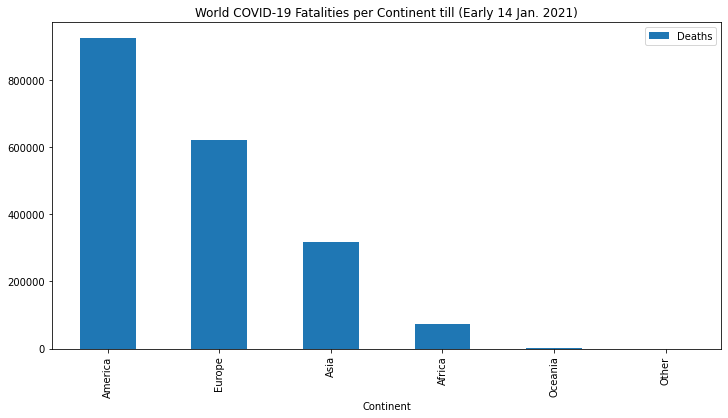

In [26]:
deaths_by_continent.plot(kind='bar', x='Continent', y='Deaths', legend=True, figsize=(12,6))
plt.title("World COVID-19 Fatalities per Continent till (Early 14 Jan. 2021)")
plt.savefig('wcov19contfate')

In [27]:
# By Country
confirmed_by_country = jdf.groupby(['Country'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_country.columns = ['Country','Confirmed']
confirmed_by_country.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_country.head(50)

,Country,Confirmed
199,US,22423006
90,India,10466595
27,Brazil,8131612
159,Russia,3425269
198,UK,3072349
69,France,2783256
97,Italy,2276491
180,Spain,2111782
74,Germany,1921024
42,Colombia,1801903


In [28]:
# By Continent
confirmed_by_continent = jdf.groupby(['Continent'])['Confirmed'].sum().to_frame(name = 'Confirmed').reset_index()
confirmed_by_continent.columns = ['Continent','Confirmed']
confirmed_by_continent.sort_values(by='Confirmed', ascending=False, inplace=True)
confirmed_by_continent.head()

,Continent,Confirmed
1,America,39844634
3,Europe,28291217
2,Asia,18549010
0,Africa,3059974
4,Oceania,56556


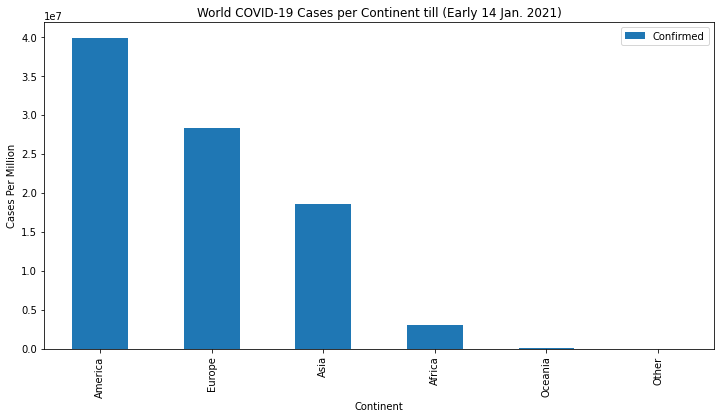

In [29]:
confirmed_by_continent.plot(kind='bar', x='Continent', y='Confirmed', legend=True, figsize=(12,6))
plt.ylabel('Cases Per Million')      
plt.title("World COVID-19 Cases per Continent till (Early 14 Jan. 2021)")      
plt.savefig('wcov19contcases')      
plt.show()

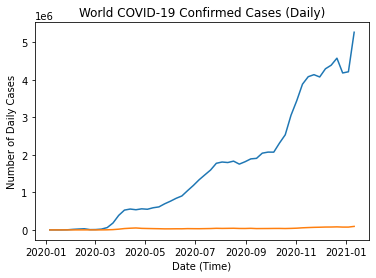

In [30]:
# Plot confirmed cases worldwide
cf = jdf.groupby('Date')[['Country', 'Confirmed', 'Deaths']].sum()

plt.xlabel('Date (Time)')
plt.ylabel('Number of Daily Cases')
plt.title('World COVID-19 Confirmed Cases (Daily)')

plt.plot(cf)

In [31]:
cf.describe()

,Confirmed,Deaths
count,5.400000e+01,54.000000
mean,1.663002e+06,35935.722222
std,1.532463e+06,24209.204288
min,1.000000e+00,0.000000
25%,5.307742e+05,28343.500000
50%,1.402518e+06,36936.000000
75%,2.256051e+06,43625.500000
max,5.270998e+06,93681.000000


In [32]:
# Plot and save trendline graph
def create_trend_line(jdf, col3, col4):
    fig, ax = plt.subplots(figsize=(10,6))
    ndf.groupby(['Date'])[['Confirmed', 'Deaths']].sum().plot(ax=ax, marker='+')
    fig = ax.get_figure()

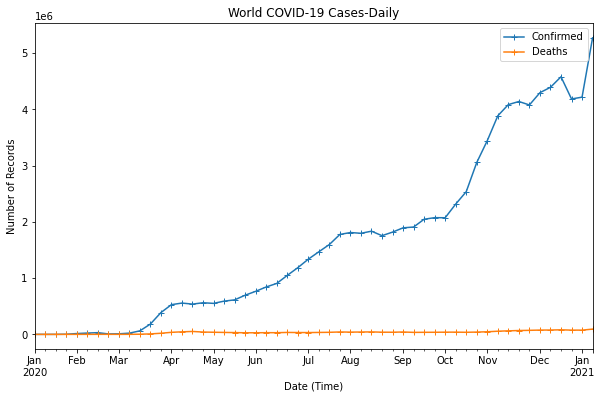

In [33]:
create_trend_line(jdf, 'Confirmed', 'Deaths')
plt.xlabel('Date (Time)')
plt.ylabel('Number of Records')
plt.title('World COVID-19 Cases-Daily')
plt.savefig('wcovid19daily')

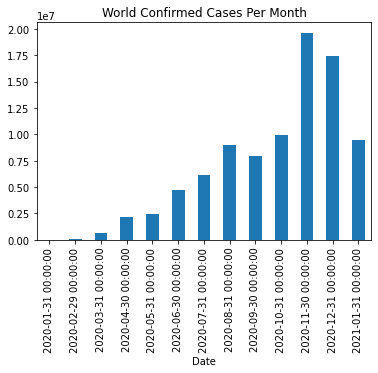

In [34]:
jdf['Confirmed'].resample('M').sum().plot(kind='bar', title='World Confirmed Cases Per Month')
plt.savefig('wcov19casespermonth')

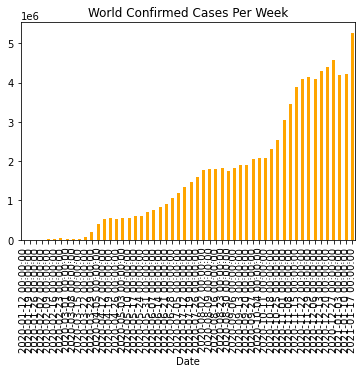

In [35]:
jdf['Confirmed'].resample('W').sum().plot(kind='bar', color='orange', title='World Confirmed Cases Per Week')
plt.savefig('wcov19casesperweek')

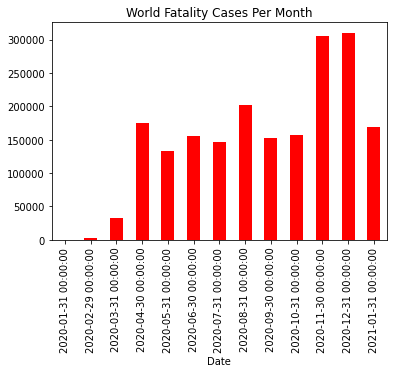

In [36]:
jdf['Deaths'].resample('M').sum().plot(kind='bar', color='red', title='World Fatality Cases Per Month')
plt.savefig('wcov19fatpermonth')

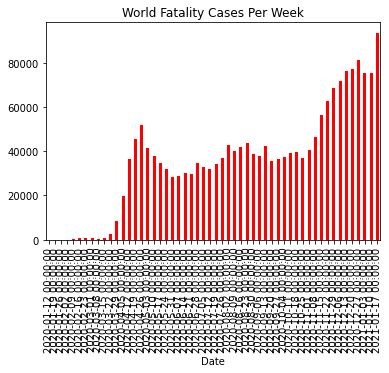

In [37]:
jdf['Deaths'].resample('W').sum().plot(kind='bar', color='red', title='World Fatality Cases Per Week')
plt.savefig('wcov19fatperweek')

<AxesSubplot:xlabel='Date'>

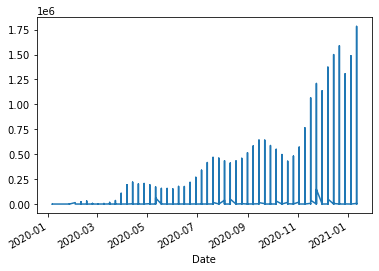

In [38]:
jdf['Confirmed'].plot()

In [39]:
con_cases = jdf['Confirmed'].sum()
dt_cases = jdf['Deaths'].sum()

In [40]:
fatality_rate = dt_cases/(con_cases+dt_cases)*100

In [41]:
# World case fatality rate
print('World case fatality rate :', fatality_rate)

World case fatality rate : 2.11518800557538


In [42]:
# Total covid-19 fatalities worldwide
print('Total fatalities :', dt_cases)

Total fatalities : 1940529


In [43]:
# Total covid-19 confirmed cases worldwide
print('Total confirmed cases :', con_cases)

Total confirmed cases : 89802096


In [44]:
# visualization of some countries in the world to monitor the situation

# CHINA STATE
df_cn = jdf[jdf['Country']=='China'].reset_index()
# ITALY STATE               
df_it = jdf[jdf['Country']=='Italy'].reset_index()
# IRAN STATE
df_ir = jdf[jdf['Country']=='Iran'].reset_index()
# SPAIN STATE
df_sp = jdf[jdf['Country']=='Spain'].reset_index()
# FRANCE STATE
df_fr = jdf[jdf['Country']=='France'].reset_index()
# SOUTH KOREA STATE
df_skr = jdf[jdf['Country']=='South Korea'].reset_index()

# filter down on dates
df_cn  = df_cn[df_cn['Date'] >= ('2020-01-17')]
df_it = df_it[df_it['Date'] >= ('2020-01-17')]
df_ir = df_ir[df_ir['Date'] >= ('2020-01-17')]
df_sp = df_sp[df_sp['Date'] >= ('2020-01-17')]
df_fr = df_fr[df_fr['Date'] >= ('2020-01-17')]
df_skr = df_skr[df_skr['Date'] >= ('2020-01-17')]

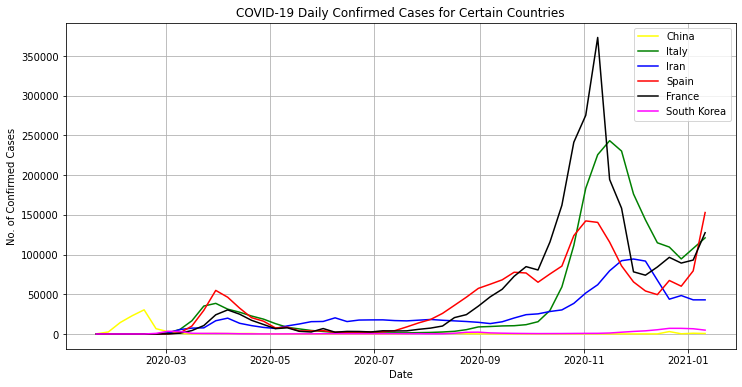

In [45]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Confirmed'],color='yellow')
ax.plot(df_it['Date'], df_it['Confirmed'],color='green')
ax.plot(df_ir['Date'], df_ir['Confirmed'],color='blue')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='red')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='black')
ax.plot(df_skr['Date'], df_skr['Confirmed'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covidstate1')

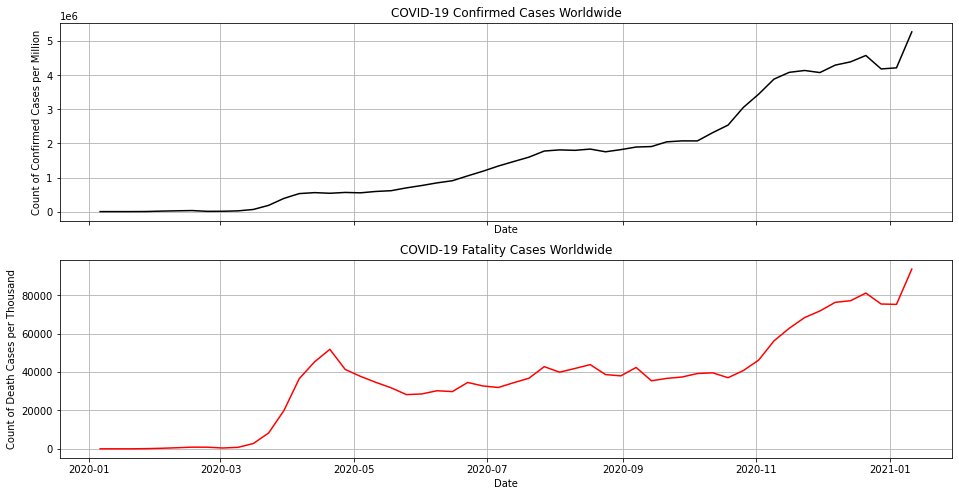

In [46]:
wdf = jdf.groupby(['Date'])[['Confirmed','Deaths']].sum().reset_index()

#plotting new cases by day worldwide
plt.rcParams['figure.figsize'] = [16, 8]
fig, ax = plt.subplots(2,sharex=True)

# top chart as confirmed cases
ax[0].plot(wdf['Date'], wdf['Confirmed'],color='black')
ax[0].set(xlabel='Date', ylabel='Count of Confirmed Cases per Million',
       title='COVID-19 Confirmed Cases Worldwide')
ax[0].grid()
plt.savefig('covidworldwidestate')

# bottom chart as deaths
ax[1].plot(wdf['Date'], wdf['Deaths'],color='red')
ax[1].set(xlabel='Date', ylabel='Count of Death Cases per Thousand',
       title='COVID-19 Fatality Cases Worldwide')
ax[1].grid()
plt.savefig('covidworldwidedeaths')

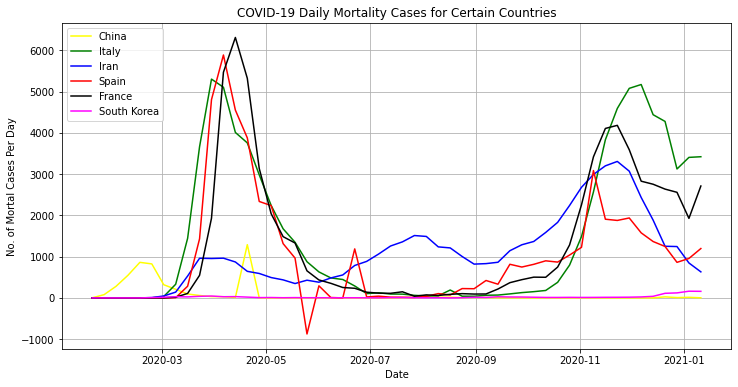

In [47]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_cn['Date'], df_cn['Deaths'],color='yellow')
ax.plot(df_it['Date'], df_it['Deaths'],color='green')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='blue')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='red')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='black')
ax.plot(df_skr['Date'], df_skr['Deaths'],color='magenta')



ax.set(xlabel='Date', ylabel='No. of Mortal Cases Per Day',
       title='COVID-19 Daily Mortality Cases for Certain Countries')
ax.legend(['China','Italy','Iran','Spain','France','South Korea'])
ax.grid()
plt.savefig('covideathsstate2')

In [48]:
# Calculate Italy mortality rate
df_it
itcon = df_it['Confirmed'].sum()
itdt = df_it['Deaths'].sum()
it_mort_rate = itdt/(itcon+itdt)*100

In [49]:
it_mort_rate

3.3438120688879205

In [50]:
# Italy mortality rate Compared to World Average
itw = (it_mort_rate/fatality_rate) * 100

In [51]:
print('Italy Mortality Rate Compared to World Average is :', itw ,'%')

Italy Mortality Rate Compared to World Average is : 158.08580892450394 %


In [52]:
# Calculate China mortality rate
df_cn
chcon = df_cn['Confirmed'].sum()
chdt = df_cn['Deaths'].sum()
ch_mort_rate = chdt/(chcon+chdt)*100

In [53]:
ch_mort_rate

4.712902876387234

In [54]:
# China Mortality rate compared to World Average
chw = (ch_mort_rate/fatality_rate) * 100

In [55]:
print('China Mortality Rate Compared to World Average is :', chw ,'%')

China Mortality Rate Compared to World Average is : 222.81248115839304 %


In [56]:
# Calculate Spain mortality rate
df_sp
spcon = df_sp['Confirmed'].sum()
spdt = df_sp['Deaths'].sum()
sp_mort_rate = spdt/(spcon+spdt)*100

In [57]:
sp_mort_rate

2.4156018071612717

In [58]:
# Spain Mortality rate compared to World Average
spw = (sp_mort_rate/fatality_rate) * 100

In [59]:
print('Spain Mortality Rate Compared to World Average is :', spw ,'%')

Spain Mortality Rate Compared to World Average is : 114.20269975028401 %


In [60]:
# Calculate France mortality rate
df_fr
frcon = df_fr['Confirmed'].sum()
frdt = df_fr['Deaths'].sum()
fr_mort_rate = frdt/(frcon+frdt)*100

In [61]:
fr_mort_rate

2.3763541711241576

In [62]:
# France Mortality rate compared to World Average
frw = (fr_mort_rate/fatality_rate) * 100

In [63]:
print('France Mortality Rate Compared to World Average is :', frw ,'%')

France Mortality Rate Compared to World Average is : 112.34718449898426 %


In [64]:
# Calculate Iran mortality rate
df_ir
ircon = df_ir['Confirmed'].sum()
irdt = df_ir['Deaths'].sum()
ir_mort_rate = irdt/(ircon+irdt)*100

In [65]:
ir_mort_rate

4.18381962449826

In [66]:
# Iran Mortality rate compared to World Average
irw = (ir_mort_rate/fatality_rate) * 100

In [67]:
print('Iran Mortality Rate Compared to World Average is :', irw ,'%')

Iran Mortality Rate Compared to World Average is : 197.79894805900076 %


In [68]:
# # visualization of some countries in the world to monitor the situation part 2

# Germany STATE
df_gr = jdf[jdf['Country']=='Germany'].reset_index()
# USA STATE               
df_us = jdf[jdf['Country']=='US'].reset_index()
# UK STATE
df_uk = jdf[jdf['Country']=='UK'].reset_index()
# NL STATE
df_nl = jdf[jdf['Country']=='Netherlands'].reset_index()
# SWISS STATE
df_sw = jdf[jdf['Country']=='Switzerland'].reset_index()
# Japan STATE
df_jp = jdf[jdf['Country']=='Japan'].reset_index()

# filter down on dates
df_gr  = df_gr[df_gr['Date'] >= ('2020-01-17')]
df_us = df_us[df_us['Date'] >= ('2020-01-17')]
df_uk = df_uk[df_uk['Date'] >= ('2020-01-17')]
df_nl = df_nl[df_nl['Date'] >= ('2020-01-17')]
df_sw = df_sw[df_sw['Date'] >= ('2020-01-17')]
df_jp = df_jp[df_jp['Date'] >= ('2020-01-17')]

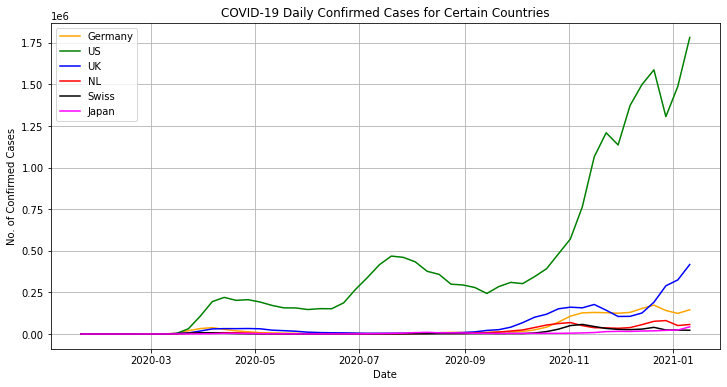

In [69]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='orange')
ax.plot(df_us['Date'], df_us['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='blue')
ax.plot(df_nl['Date'], df_nl['Confirmed'],color='red')
ax.plot(df_sw['Date'], df_sw['Confirmed'],color='black')
ax.plot(df_jp['Date'], df_jp['Confirmed'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covidstate2')

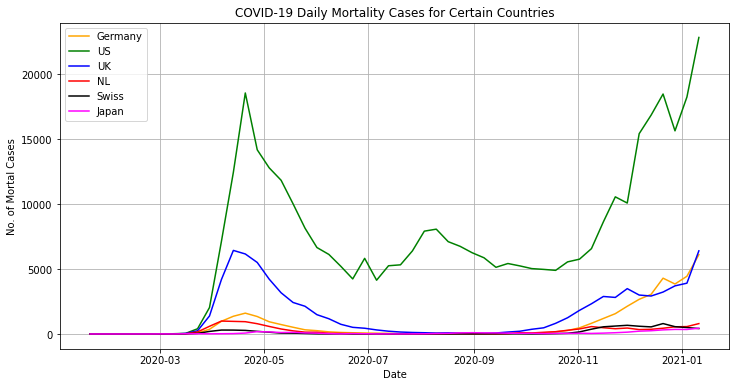

In [70]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_gr['Date'], df_gr['Deaths'],color='orange')
ax.plot(df_us['Date'], df_us['Deaths'],color='green')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='blue')
ax.plot(df_nl['Date'], df_nl['Deaths'],color='red')
ax.plot(df_sw['Date'], df_sw['Deaths'],color='black')
ax.plot(df_jp['Date'], df_jp['Deaths'],color='magenta')


ax.set(xlabel='Date', ylabel='No. of Mortal Cases',
       title='COVID-19 Daily Mortality Cases for Certain Countries')
ax.legend(['Germany','US','UK','NL','Swiss','Japan'])
ax.grid()
plt.savefig('covideathsstate3')

In [71]:
# visualization of some countries in the world to monitor the situation part 3

# Egypt STATE
df_eg = jdf[jdf['Country']=='Egypt'].reset_index()
# Israel STATE               
df_il = jdf[jdf['Country']=='Israel'].reset_index()
# Turkey STATE
df_tr = jdf[jdf['Country']=='Turkey'].reset_index()
# Iraq STATE
df_iq = jdf[jdf['Country']=='Iraq'].reset_index()
# Qatar STATE
df_qr = jdf[jdf['Country']=='Qatar'].reset_index()
# Bahrain STATE
df_bn = jdf[jdf['Country']=='Bahrain'].reset_index()

# filter down on dates
df_eg  = df_eg[df_eg['Date'] >= ('2020-01-17')]
df_il = df_il[df_il['Date'] >= ('2020-01-17')]
df_tr = df_tr[df_tr['Date'] >= ('2020-01-17')]
df_iq = df_iq[df_iq['Date'] >= ('2020-01-17')]
df_qr = df_qr[df_qr['Date'] >= ('2020-01-17')]
df_bn = df_bn[df_bn['Date'] >= ('2020-01-17')]

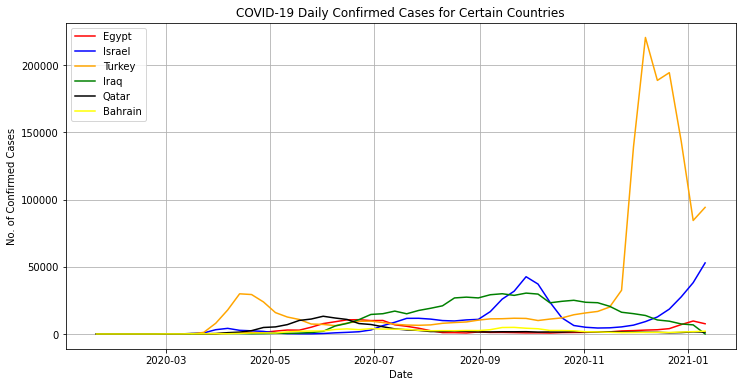

In [72]:
# plotting

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_eg['Date'], df_eg['Confirmed'],color='red')
ax.plot(df_il['Date'], df_il['Confirmed'],color='blue')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='orange')
ax.plot(df_iq['Date'], df_iq['Confirmed'],color='green')
ax.plot(df_qr['Date'], df_qr['Confirmed'],color='black')
ax.plot(df_bn['Date'], df_bn['Confirmed'],color='yellow')


ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='COVID-19 Daily Confirmed Cases for Certain Countries')
ax.legend(['Egypt','Israel','Turkey','Iraq','Qatar','Bahrain'])
ax.grid()
plt.savefig('covidstate3')

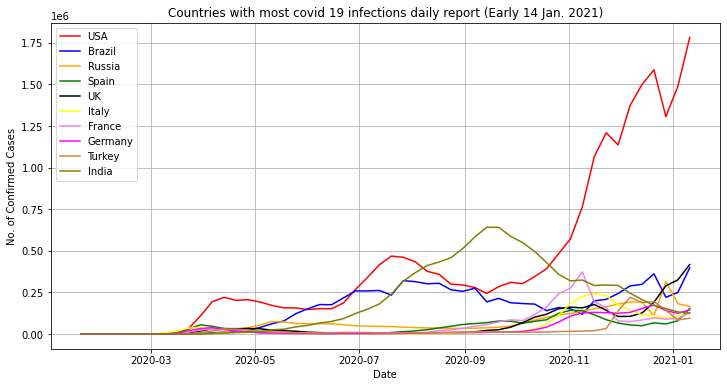

In [73]:
# visualization of some countries in the world to monitor the situation part 4

# Brazil STATE
df_br = jdf[jdf['Country']=='Brazil'].reset_index()
df_br = df_br[df_br['Date'] >= ('2020-01-17')]

# Russia STATE
df_ru = jdf[jdf['Country']=='Russia'].reset_index()
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]

# India STATE
df_in = jdf[jdf['Country']=='India'].reset_index()
df_in = df_in[df_in['Date'] >= ('2020-01-17')]


# plotting Some Countries with most covid 19 infections (needs review to add more countries)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_us['Date'], df_us['Confirmed'],color='red')
ax.plot(df_br['Date'], df_br['Confirmed'],color='blue')
ax.plot(df_ru['Date'], df_ru['Confirmed'],color='orange')
ax.plot(df_sp['Date'], df_sp['Confirmed'],color='green')
ax.plot(df_uk['Date'], df_uk['Confirmed'],color='black')
ax.plot(df_it['Date'], df_it['Confirmed'],color='yellow')
ax.plot(df_fr['Date'], df_fr['Confirmed'],color='violet')
ax.plot(df_gr['Date'], df_gr['Confirmed'],color='magenta')
ax.plot(df_tr['Date'], df_tr['Confirmed'],color='peru')
ax.plot(df_in['Date'], df_in['Confirmed'],color='olive')

ax.set(xlabel='Date', ylabel='No. of Confirmed Cases',
       title='Countries with most covid 19 infections daily report (Early 14 Jan. 2021)')
ax.legend(['USA','Brazil','Russia','Spain','UK','Italy', 'France', 'Germany', 'Turkey', 'India'])
ax.grid()
plt.savefig('topcovidstate')

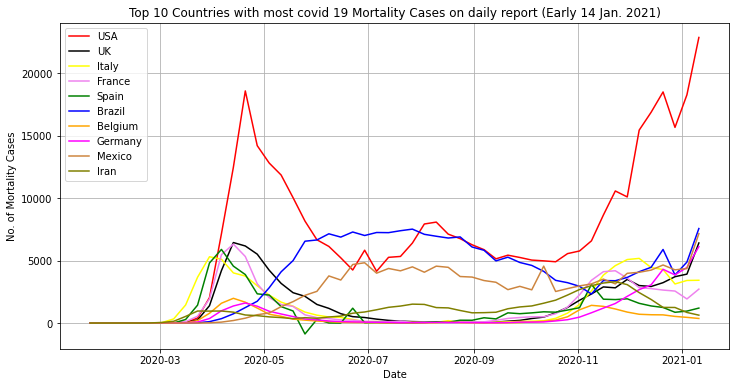

In [74]:
# Belgium STATE
df_bgm = jdf[jdf['Country']=='Belgium'].reset_index()
df_bgm = df_bgm[df_bgm['Date'] >= ('2020-01-17')]

# Mexico STATE
df_mx = jdf[jdf['Country']=='Mexico'].reset_index()
df_mx = df_mx[df_mx['Date'] >= ('2020-01-17')]

# plotting Top 10 Countries with most covid 19 Fatalities (needs review to add more countries)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_us['Date'], df_us['Deaths'],color='red')
ax.plot(df_uk['Date'], df_uk['Deaths'],color='black')
ax.plot(df_it['Date'], df_it['Deaths'],color='yellow')
ax.plot(df_fr['Date'], df_fr['Deaths'],color='violet')
ax.plot(df_sp['Date'], df_sp['Deaths'],color='green')
ax.plot(df_br['Date'], df_br['Deaths'],color='blue')
ax.plot(df_bgm['Date'], df_bgm['Deaths'],color='orange')
ax.plot(df_gr['Date'], df_gr['Deaths'],color='magenta')
ax.plot(df_mx['Date'], df_mx['Deaths'],color='peru')
ax.plot(df_ir['Date'], df_ir['Deaths'],color='olive')

ax.set(xlabel='Date', ylabel='No. of Mortality Cases',
       title='Top 10 Countries with most covid 19 Mortality Cases on daily report (Early 14 Jan. 2021)')
ax.legend(['USA','UK','Italy','France','Spain','Brazil', 'Belgium', 'Germany', 'Mexico', 'Iran'])
ax.grid()
plt.savefig('topmortcovidstate')

In [75]:
# South Africa STATE
df_sa = jdf[jdf['Country']=='South Africa'].reset_index()
# KSA STATE               
df_ksa = jdf[jdf['Country']=='Saudi Arabia'].reset_index()
# India STATE
df_in = jdf[jdf['Country']=='India'].reset_index()
# Russia STATE
df_ru = jdf[jdf['Country']=='Russia'].reset_index()
# Norway STATE
df_no = jdf[jdf['Country']=='Norway'].reset_index()
# Australia STATE
df_au = jdf[jdf['Country']=='Australia'].reset_index()
# Pakistan STATE
df_pk = jdf[jdf['Country']=='Pakistan'].reset_index()
# Indonesia STATE
df_inesia = jdf[jdf['Country']=='Indonesia'].reset_index()
# Brazil STATE
df_br = jdf[jdf['Country']=='Brazil'].reset_index()
# Sweden STATE
df_swd = jdf[jdf['Country']=='Sweden'].reset_index()


# filter down on dates
df_sa  = df_sa[df_sa['Date'] >= ('2020-01-17')]
df_ksa = df_ksa[df_ksa['Date'] >= ('2020-01-17')]
df_in = df_in[df_in['Date'] >= ('2020-01-17')]
df_ru = df_ru[df_ru['Date'] >= ('2020-01-17')]
df_no = df_no[df_no['Date'] >= ('2020-01-17')]
df_au = df_au[df_au['Date'] >= ('2020-01-17')]
df_pk = df_pk[df_pk['Date'] >= ('2020-01-17')]
df_inesia = df_inesia[df_inesia['Date'] >= ('2020-01-17')]
df_br = df_br[df_br['Date'] >= ('2020-01-17')]
df_swd = df_swd[df_swd['Date'] >= ('2020-01-17')]

In [76]:
#Germany

df_gr
grcon = df_gr['Confirmed'].sum()
grdt = df_gr['Deaths'].sum()
gr_mort_rate = grdt/(grcon+grdt)*100

In [77]:
#US

df_us
uscon = df_us['Confirmed'].sum()
usdt = df_us['Deaths'].sum()
us_mort_rate = usdt/(uscon+usdt)*100

In [78]:
#UK

df_uk
ukcon = df_uk['Confirmed'].sum()
ukdt = df_uk['Deaths'].sum()
uk_mort_rate = ukdt/(ukcon+ukdt)*100

In [79]:
#Netherlands

df_nl
nlcon = df_nl['Confirmed'].sum()
nldt = df_nl['Deaths'].sum()
nl_mort_rate = nldt/(nlcon+nldt)*100

In [80]:
#Swiss

df_sw
swcon = df_sw['Confirmed'].sum()
swdt = df_sw['Deaths'].sum()
sw_mort_rate = swdt/(swcon+swdt)*100

In [81]:
#South Korea

df_skr
skrcon = df_skr['Confirmed'].sum()
skrdt = df_skr['Deaths'].sum()
skr_mort_rate = skrdt/(skrcon+skrdt)*100

In [82]:
#Japan

df_jp
jpcon = df_jp['Confirmed'].sum()
jpdt = df_jp['Deaths'].sum()
jp_mort_rate = jpdt/(jpcon+jpdt)*100

In [83]:
#Egypt

df_eg
egcon = df_eg['Confirmed'].sum()
egdt = df_eg['Deaths'].sum()
eg_mort_rate = egdt/(egcon+egdt)*100

In [84]:
#Israel

df_il
ilcon = df_il['Confirmed'].sum()
ildt = df_il['Deaths'].sum()
il_mort_rate = ildt/(ilcon+ildt)*100

In [85]:
#Iraq

df_iq
iqcon = df_iq['Confirmed'].sum()
iqdt = df_iq['Deaths'].sum()
iq_mort_rate = iqdt/(iqcon+iqdt)*100

In [86]:
#Turkey

df_tr
trcon = df_tr['Confirmed'].sum()
trdt = df_tr['Deaths'].sum()
tr_mort_rate = trdt/(trcon+trdt)*100

In [87]:
#Qatar

df_qr
qrcon = df_qr['Confirmed'].sum()
qrdt = df_qr['Deaths'].sum()
qr_mort_rate = qrdt/(qrcon+qrdt)*100

In [88]:
#Bahrain

df_bn
bncon = df_bn['Confirmed'].sum()
bndt = df_bn['Deaths'].sum()
bn_mort_rate = bndt/(bncon+bndt)*100

In [89]:
#South Africa

df_sa
sacon = df_sa['Confirmed'].sum()
sadt = df_sa['Deaths'].sum()
sa_mort_rate = sadt/(sacon+sadt)*100

In [90]:
#India

df_in
incon = df_in['Confirmed'].sum()
indt = df_in['Deaths'].sum()
in_mort_rate = indt/(incon+indt)*100

In [91]:
#Pakistan

df_pk
pkcon = df_pk['Confirmed'].sum()
pkdt = df_pk['Deaths'].sum()
pk_mort_rate = pkdt/(pkcon+pkdt)*100

In [92]:
#Russia

df_ru
rucon = df_ru['Confirmed'].sum()
rudt = df_ru['Deaths'].sum()
ru_mort_rate = rudt/(rucon+rudt)*100

In [93]:
# Norway

df_no
nocon = df_no['Confirmed'].sum()
nodt = df_no['Deaths'].sum()
no_mort_rate = nodt/(nocon+nodt)*100

In [94]:
# KSA

df_ksa
ksacon = df_ksa['Confirmed'].sum()
ksadt = df_ksa['Deaths'].sum()
ksa_mort_rate = ksadt/(ksacon+ksadt)*100

In [95]:
# Australia

df_au
aucon = df_au['Confirmed'].sum()
audt = df_au['Deaths'].sum()
au_mort_rate = audt/(aucon+audt)*100

In [96]:
# Indonesia

df_inesia
inesiacon = df_inesia['Confirmed'].sum()
inesiadt = df_inesia['Deaths'].sum()
inesia_mort_rate = inesiadt/(inesiacon+inesiadt)*100

In [97]:
# Brazil

df_br
brcon = df_br['Confirmed'].sum()
brdt = df_br['Deaths'].sum()
br_mort_rate = brdt/(brcon+brdt)*100

In [98]:
# Sweden
df_swd
swdcon = df_swd['Confirmed'].sum()
swddt = df_swd['Deaths'].sum()
swd_mort_rate = swddt/(swdcon+swddt)*100

In [99]:
# monitor the situation

twc = jdf.Confirmed.sum()
twd = jdf.Deaths.sum()

In [100]:
data = {'Confirmed Cases Worldwide (Per Million)':twc,'Death Cases Worldwide (Per Thousand)':twd,'World Fatality_rate % (Percentage)':fatality_rate, 
       'China Confirmed Cases':chcon, 'China Death Cases':chdt, 'China Fatality Rate %':ch_mort_rate,
       'Italy Confirmed Cases':itcon, 'Italy Death Cases':itdt, 'Italy Fatality Rate %':it_mort_rate,
       'Spain Confirmed Cases':spcon, 'Spain Death Cases':spdt, 'Spain Fatality Rate %': sp_mort_rate,
       'France Confirmed Cases':frcon, 'France Death Cases':frdt, 'France Fatality Rate %':fr_mort_rate,
       'Iran Confirmed Cases':ircon, 'Iran Death Cases':irdt, 'Iran Fatality Rate %':ir_mort_rate,
       'Germany Confirmed Cases':grcon, 'Germany Death Cases':grdt, 'Germany Fatality Rate %':gr_mort_rate,
       'US Confirmed Cases':uscon, 'US Death Cases':usdt, 'US Fatality Rate %':us_mort_rate,
       'UK Confirmed Cases':ukcon, 'UK Death Cases':ukdt, 'UK Fatality Rate %':uk_mort_rate,
       'Netherlands (Holland) Confirmed Cases':nlcon, 'Netherlands (Holland) Death Cases':nldt, 'Netherlands (Holland) Fatality Rate %':nl_mort_rate,
       'Swiss Confirmed Cases':swcon, 'Swiss Death Cases':swdt, 'Swiss Fatality Rate %':sw_mort_rate,
       'Norway Confirmed Cases':nocon, 'Norway Death Cases':nodt, 'Norway Fatality Rate %':no_mort_rate,
       'Sweden Confirmed Cases':swdcon, 'Sweden Death Cases':swddt, 'Sweden Fatality Rate %':swd_mort_rate,
       'South Korea Confirmed Cases':skrcon, 'South Korea Death Cases':skrdt, 'South Korea Fatality Rate %':skr_mort_rate,
       'Japan Confirmed Cases':jpcon, 'Japan Death Cases':jpdt, 'Japan Fatality Rate %':jp_mort_rate,
       'Russia Confirmed Cases':rucon, 'Russia Death Cases':rudt, 'Russia Fatality Rate %':ru_mort_rate,
       'Israel Confirmed Cases':ilcon, 'Israel Death Cases':ildt, 'Israel Fatality Rate %':il_mort_rate,
       'Iraq Confirmed Cases':iqcon, 'Iraq Death Cases':iqdt, 'Iraq Fatality Rate %':iq_mort_rate,
       'Turkey Confirmed Cases':trcon, 'Turkey Death Cases':trdt, 'Turkey Fatality Rate %':tr_mort_rate,
       'Qatar Confirmed Cases':qrcon, 'Qatar Death Cases':qrdt, 'Qatar Fatality Rate %':qr_mort_rate,
       'Saudi Arabia Confirmed Cases':ksacon, 'Saudi Arabia Death Cases':ksadt, 'Saudi Arabia Fatality Rate %': ksa_mort_rate,
       'Egypt Confirmed Cases':egcon, 'Egypt Death Cases':egdt, 'Egypt Fatality Rate %':eg_mort_rate,
       'South Africa Confirmed Cases':sacon, 'South Africa Death Cases':sadt, 'South Africa Fatality Rate %':sa_mort_rate,
       'India Confirmed Cases':incon, 'India Death Cases':indt, 'India Fatality Rate %': in_mort_rate,
       'Pakistan Confirmed Cases':pkcon, 'Pakistan Death Cases':pkdt, 'Pakistan Fatality Rate %': pk_mort_rate,
       'Australia Confirmed Cases':aucon, 'Australia Death Cases':audt, 'Australia Fatality Rate %': au_mort_rate,
       'Indonesia Confirmed Cases':inesiacon, 'Indonesia Death Cases':inesiadt, 'Indonesia Fatality Rate %': inesia_mort_rate,
       'Brazil Confirmed Cases':brcon, 'Brazil Death Cases':brdt, 'Brazil Fatality Rate %': br_mort_rate,
       }

data = pd.DataFrame.from_dict(data, orient='index' ,columns=['Total Count or Rate'])

data.style.background_gradient(cmap='Oranges')

,Total Count or Rate
Confirmed Cases Worldwide (Per Million),89802096.000000
Death Cases Worldwide (Per Thousand),1940529.000000
World Fatality_rate % (Percentage),2.115188
China Confirmed Cases,96765.000000
China Death Cases,4786.000000
China Fatality Rate %,4.712903
Italy Confirmed Cases,2276491.000000
Italy Death Cases,78755.000000
Italy Fatality Rate %,3.343812
Spain Confirmed Cases,2111782.000000


In [101]:
#data = data.to_csv(r'statistics.csv')

In [102]:
#data = pd.read_csv('statistics.csv')

In [103]:
#data = data.rename(columns={'Unnamed: 0': 'State'})

In [104]:
#data = data.astype({'Total Count or Rate': float})

In [105]:
#data.head(85)

In [106]:
df_per_day = jdf.groupby('Date')[['Confirmed','Deaths']].sum()

In [107]:
df_per_day.head()

,Confirmed,Deaths
Date,,
2020-01-06,59,0
2020-01-13,1,1
2020-01-20,180,2
2020-01-27,2581,78
2020-02-03,14552,281


In [108]:
df_per_day.tail()

,Confirmed,Deaths
Date,,
2020-12-14,4392201,77207
2020-12-21,4579414,81186
2020-12-28,4185064,75485
2021-01-04,4216915,75296
2021-01-11,5270998,93681


In [109]:
# Max. No. of confirmed cases per day
df_per_day['Confirmed'].max()

5270998

In [110]:
# Date of Max. No. of confirmed cases
df_per_day['Confirmed'].idxmax()

Timestamp('2021-01-11 00:00:00')

In [111]:
# Min. No. of confirmed cases per day
df_per_day['Confirmed'].min()

1

In [112]:
# Date of Min. No. of confirmed cases
df_per_day['Confirmed'].idxmin()

Timestamp('2020-01-13 00:00:00')

In [113]:
# Max. No. of death cases per day
df_per_day['Deaths'].max()

93681

In [114]:
# Date of Max. No. of death cases
df_per_day['Deaths'].idxmax()

Timestamp('2021-01-11 00:00:00')

In [115]:
# Min. No. of death cases per day
df_per_day['Deaths'].min()

0

In [116]:
# Date of Min. No. of death cases
df_per_day['Deaths'].idxmin()

Timestamp('2020-01-06 00:00:00')

In [117]:
jdf['Country'].value_counts()

Guinea                              87
Indonesia                           54
Lithuania                           54
South Korea                         54
Mexico                              54
                                    ..
Solomon_Islands                     13
Marshall_Islands                    11
The Diamond Princess                 9
Vanuatu                              9
Micronesia_(Federated_States_of)     1
Name: Country, Length: 214, dtype: int64

In [118]:
len(jdf['Country'].unique())

214

In [119]:
jdf.loc['2020-01'][['Confirmed','Deaths']].sum()

Confirmed    2821
Deaths         81
dtype: int64

In [120]:
f_rate0 = 213/9797*100
f_rate0

2.1741349392671228

In [121]:
jdf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    76519
Deaths        2538
dtype: int64

In [122]:
f_rate1 = 2766/77237*100
f_rate1

3.581185183267087

In [123]:
jdf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    664926
Deaths        32134
dtype: int64

In [124]:
f_rate2 = 40220/796685*100
f_rate2

5.048419387838355

In [125]:
jdf.loc['2020-04-01':'2020-05-01'][['Confirmed','Deaths']].sum()

Confirmed    2185179
Deaths        175146
dtype: int64

In [126]:
f_rate3 = 194979/2415517*100
f_rate3

8.071936566788809

In [127]:
jdf.loc['2020-05-01':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    3216734
Deaths        161083
dtype: int64

In [128]:
f_rate4 = 144660/2980360*100
f_rate4

4.853776053899529

In [129]:
jdf.loc['2020-06-01':'2020-07-01'][['Confirmed','Deaths']].sum()

Confirmed    4747394
Deaths        156054
dtype: int64

In [130]:
f_rate5 = 141554/4426923*100
f_rate5

3.1975708635546636

In [131]:
jdf.loc['2020-07-01':'2020-08-01'][['Confirmed','Deaths']].sum()

Confirmed    6179080
Deaths        146059
dtype: int64

In [132]:
f_rate6 = 174174/7334170*100
f_rate6

2.3748290535943397

In [133]:
jdf.loc['2020-08-01':'2020-09-01'][['Confirmed','Deaths']].sum()

Confirmed    9014086
Deaths        202458
dtype: int64

In [134]:
f_rate7 = 91993/3914322*100
f_rate7

2.350164345191837

In [135]:
jdf.loc['2020-09-01':'2020-10-01'][['Confirmed', 'Deaths']].sum()

Confirmed    7923852
Deaths        152028
dtype: int64

In [136]:
f_rate8 = 168277/8772252*100
f_rate8

1.9182873451423876

In [137]:
jdf.loc['2020-10-01':'2020-11-01'][['Confirmed', 'Deaths']].sum()

Confirmed    9982437
Deaths        156726
dtype: int64

In [138]:
jdf.loc['2020-11-01':'2020-12-01'][['Confirmed', 'Deaths']].sum()

Confirmed    19633135
Deaths         305611
dtype: int64

In [139]:
jdf.loc['2020-12-01':'2021-01-01'][['Confirmed', 'Deaths']].sum()

Confirmed    17453333
Deaths         310237
dtype: int64

In [140]:
jdf.loc['2021-01-01':'2021-02-01'][['Confirmed', 'Deaths']].sum()

Confirmed    9487913
Deaths        168977
dtype: int64

plt.plot(['Jan.2020', 'Feb.2020', 'Mar.2020','Apr.2020', 'May 2020', 'Jun.2020', 'July 2020', 'Aug.2020', 'Sep.2020'], 
         [f_rate0, f_rate1, f_rate2, f_rate3, f_rate4, f_rate5, f_rate6, f_rate7, f_rate8])
#plt.xlablel('Months')
plt.ylabel('Fatality Rate')
plt.show()

<AxesSubplot:xlabel='Date'>

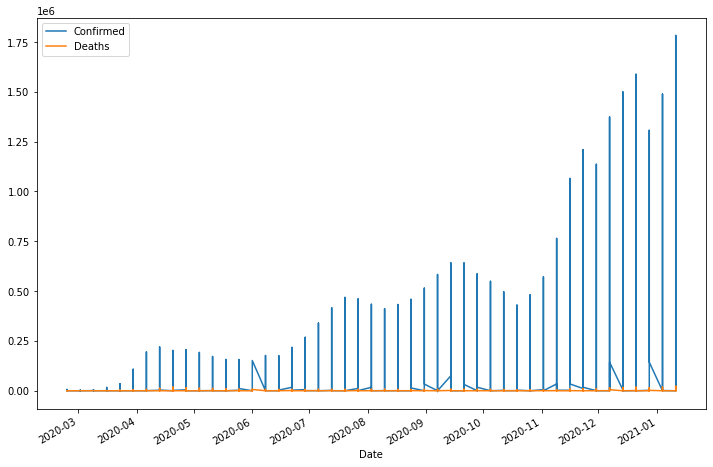

In [141]:
jdf.loc['2020-02-21':'2021-01-31'][['Confirmed','Deaths']].plot(figsize=(12,8))

In [142]:
new_df = jdf.copy()

In [143]:
df_by_date = new_df.groupby(['Date']).sum().reset_index(drop=None)

In [144]:
df_by_date

,Date,Confirmed,Deaths
0,2020-01-06,59,0
1,2020-01-13,1,1
2,2020-01-20,180,2
3,2020-01-27,2581,78
4,2020-02-03,14552,281
5,2020-02-10,23172,548
6,2020-02-17,30790,865
7,2020-02-24,8005,844
8,2020-03-02,9819,427
9,2020-03-09,21827,767


<AxesSubplot:>

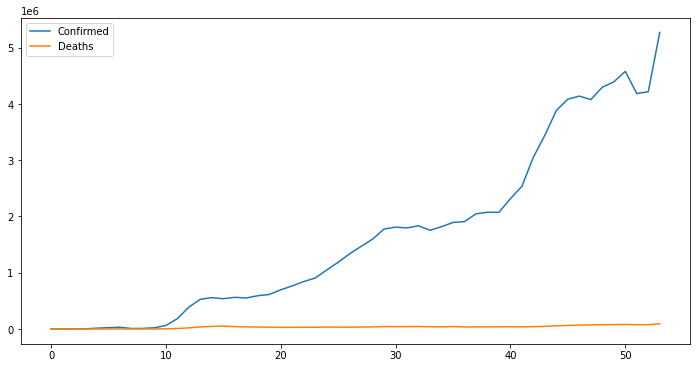

In [145]:
df_by_date[['Confirmed', 'Deaths']].plot(kind='line',figsize=(12,6))

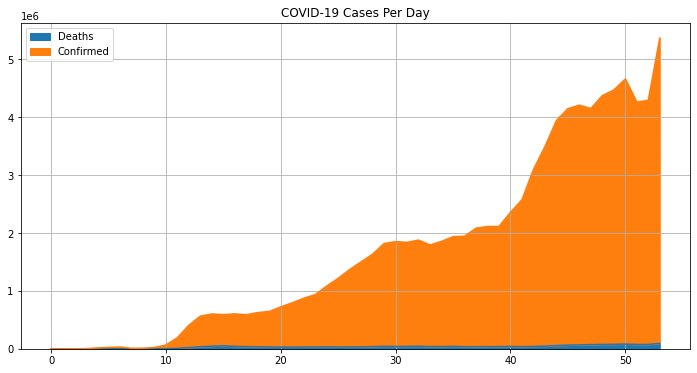

In [146]:
df_by_date[['Deaths','Confirmed']].plot(kind='area', title='COVID-19 Cases Per Day', 
                                        grid=True, figsize=(12,6))
plt.savefig('wcovid19daily22')

In [147]:
# # Situation in Egypt
df_eg.head()

,Date,Confirmed,Deaths,Country,Continent
0,2021-01-11,7605,392,Egypt,Africa
1,2021-01-04,9646,400,Egypt,Africa
2,2020-12-28,6986,307,Egypt,Africa
3,2020-12-21,3980,178,Egypt,Africa
4,2020-12-14,3143,149,Egypt,Africa


In [148]:
df_eg.tail()

,Date,Confirmed,Deaths,Country,Continent
47,2020-02-17,1,0,Egypt,Africa
48,2020-02-10,0,0,Egypt,Africa
49,2020-02-03,0,0,Egypt,Africa
50,2020-01-27,0,0,Egypt,Africa
51,2020-01-20,0,0,Egypt,Africa


In [149]:
eg_ndf = df_eg.copy()

In [150]:
eg_ndf.set_index('Date', inplace=True)
eg_ndf.sort_index(inplace=True)

In [151]:
eg_ndf.loc['2020-02-01':'2020-03-01'][['Confirmed','Deaths']].sum()

Confirmed    1
Deaths       0
dtype: int64

In [152]:
eg_ndf.loc['2020-03-01':'2020-04-01'][['Confirmed','Deaths']].sum()

Confirmed    575
Deaths        36
dtype: int64

In [153]:
eg_ndf.loc['2020-04-01':'2020-05-01'][['Confirmed','Deaths']].sum()

Confirmed    3743
Deaths        271
dtype: int64

In [154]:
eg_ndf.loc['2020-05-01':'2020-06-01'][['Confirmed','Deaths']].sum()

Confirmed    20666
Deaths         652
dtype: int64

In [155]:
eg_ndf.loc['2020-06-01':'2020-07-01'][['Confirmed','Deaths']].sum()

Confirmed    47923
Deaths        2025
dtype: int64

In [156]:
eg_ndf.loc['2020-07-01':'2020-08-01'][['Confirmed','Deaths']].sum()

Confirmed    26874
Deaths        1817
dtype: int64

In [157]:
eg_ndf.loc['2020-08-01':'2020-09-01'][['Confirmed','Deaths']].sum()

Confirmed    6665
Deaths        793
dtype: int64

In [158]:
eg_ndf.loc['2020-09-01':'2020-10-01'][['Confirmed','Deaths']].sum()

Confirmed    4113
Deaths        484
dtype: int64

In [159]:
eg_ndf.loc['2020-10-01':'2020-11-01'][['Confirmed','Deaths']].sum()

Confirmed    3700
Deaths        316
dtype: int64

In [160]:
eg_ndf.loc['2020-11-01':'2020-12-01'][['Confirmed','Deaths']].sum()

Confirmed    9001
Deaths        437
dtype: int64

In [161]:
eg_ndf.loc['2020-12-01':'2021-01-01'][['Confirmed','Deaths']].sum()

Confirmed    17000
Deaths         769
dtype: int64

In [162]:
eg_ndf.loc['2021-01-01':'2021-02-01'][['Confirmed','Deaths']].sum()

Confirmed    17251
Deaths         792
dtype: int64

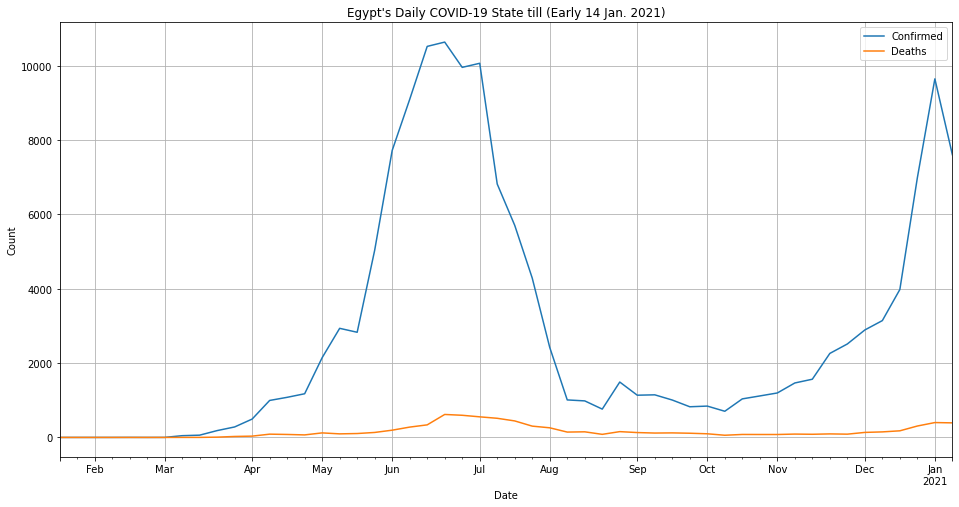

In [163]:
eg_ndf.plot(grid=True)
plt.title("Egypt's Daily COVID-19 State till (Early 14 Jan. 2021)")
plt.ylabel('Count')
plt.savefig('egycov19state')

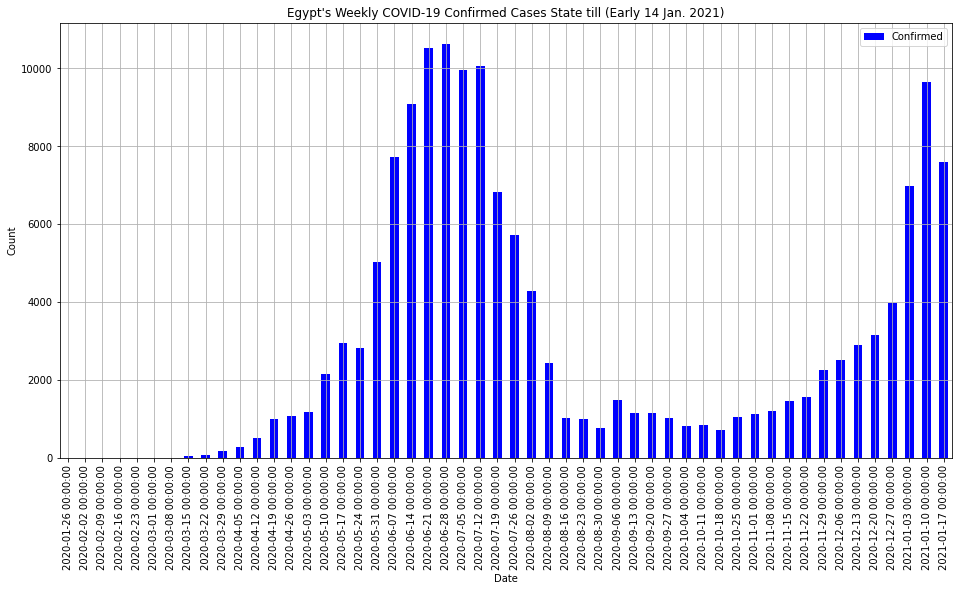

In [164]:
eg_ndf['Confirmed'].resample('W').sum().plot(kind='bar', color='blue', legend=True, grid=True)
plt.title("Egypt's Weekly COVID-19 Confirmed Cases State till (Early 14 Jan. 2021)")
plt.ylabel('Count')
plt.savefig('egycov19weeklystate')

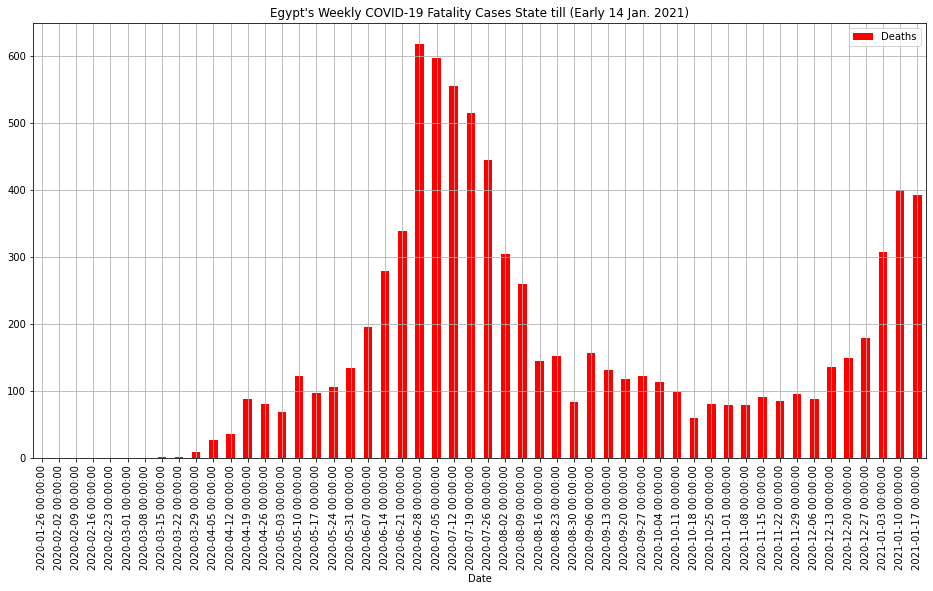

In [165]:
eg_ndf['Deaths'].resample('W').sum().plot(kind='bar', color='red', legend=True, grid=True)
plt.title("Egypt's Weekly COVID-19 Fatality Cases State till (Early 14 Jan. 2021)")
plt.savefig('egycov19weeklystate')

<AxesSubplot:title={'center':"Egypt's Daily COVID-19 State"}, xlabel='Date'>

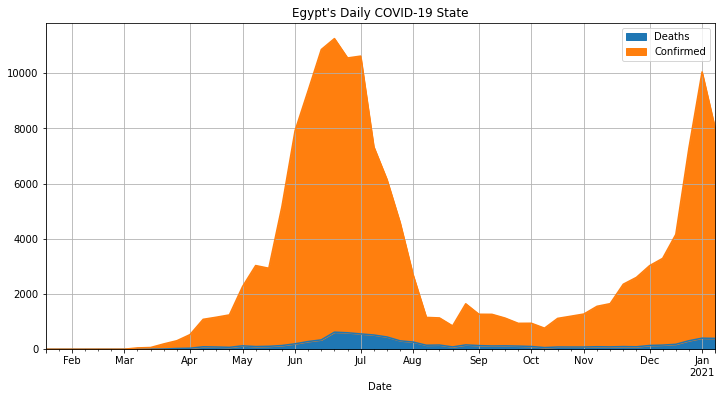

In [166]:
eg_ndf[['Deaths','Confirmed']].plot(kind='area', title="Egypt's Daily COVID-19 State", 
                                        grid=True, figsize=(12,6))

In [167]:
# Max. No. of confirmed cases recorded per day in Egypt
eg_ndf['Confirmed'].max()

10635

In [168]:
# Date of Max. No. of confirmed cases recorded in Egypt
eg_ndf['Confirmed'].idxmax()

Timestamp('2020-06-22 00:00:00')

In [169]:
# Max. No. of death cases recorded per day in Egypt
eg_ndf['Deaths'].max()

618

In [170]:
# Date of Max. No. of confirmed cases recorded in Egypt
eg_ndf['Deaths'].idxmax()

Timestamp('2020-06-22 00:00:00')

In [171]:
#eg_ndf.nlargest(10,'Confirmed')
eg_ndf.nlargest(10,['Confirmed','Deaths'])

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-06-22,10635,618,Egypt,Africa
2020-06-15,10519,338,Egypt,Africa
2020-07-06,10065,554,Egypt,Africa
2020-06-29,9955,596,Egypt,Africa
2021-01-04,9646,400,Egypt,Africa
2020-06-08,9094,278,Egypt,Africa
2020-06-01,7720,195,Egypt,Africa
2021-01-11,7605,392,Egypt,Africa
2020-12-28,6986,307,Egypt,Africa


In [172]:
eg_ndf.nsmallest(10,['Confirmed','Deaths'])

,Confirmed,Deaths,Country,Continent
Date,,,,
2020-01-20,0,0,Egypt,Africa
2020-01-27,0,0,Egypt,Africa
2020-02-03,0,0,Egypt,Africa
2020-02-10,0,0,Egypt,Africa
2020-02-24,0,0,Egypt,Africa
2020-02-17,1,0,Egypt,Africa
2020-03-02,1,0,Egypt,Africa
2020-03-09,47,1,Egypt,Africa
2020-03-16,61,1,Egypt,Africa


In [173]:
print(eg_ndf['Confirmed'].resample('M').sum())

Date
2020-01-31        0
2020-02-29        1
2020-03-31      575
2020-04-30     3743
2020-05-31    12946
2020-06-30    47923
2020-07-31    26874
2020-08-31     6665
2020-09-30     4113
2020-10-31     3700
2020-11-30     9001
2020-12-31    17000
2021-01-31    17251
Freq: M, Name: Confirmed, dtype: int64


In [174]:
print(eg_ndf['Deaths'].resample('M').sum())

Date
2020-01-31       0
2020-02-29       0
2020-03-31      36
2020-04-30     271
2020-05-31     457
2020-06-30    2025
2020-07-31    1817
2020-08-31     793
2020-09-30     484
2020-10-31     316
2020-11-30     437
2020-12-31     769
2021-01-31     792
Freq: M, Name: Deaths, dtype: int64


In [175]:
print(eg_ndf['Confirmed'].resample('W').sum())

Date
2020-01-26        0
2020-02-02        0
2020-02-09        0
2020-02-16        0
2020-02-23        1
2020-03-01        0
2020-03-08        1
2020-03-15       47
2020-03-22       61
2020-03-29      184
2020-04-05      282
2020-04-12      494
2020-04-19      995
2020-04-26     1079
2020-05-03     1175
2020-05-10     2146
2020-05-17     2935
2020-05-24     2829
2020-05-31     5036
2020-06-07     7720
2020-06-14     9094
2020-06-21    10519
2020-06-28    10635
2020-07-05     9955
2020-07-12    10065
2020-07-19     6817
2020-07-26     5705
2020-08-02     4287
2020-08-09     2421
2020-08-16     1009
2020-08-23      983
2020-08-30      762
2020-09-06     1490
2020-09-13     1136
2020-09-20     1146
2020-09-27     1006
2020-10-04      825
2020-10-11      843
2020-10-18      704
2020-10-25     1037
2020-11-01     1116
2020-11-08     1196
2020-11-15     1465
2020-11-22     1566
2020-11-29     2260
2020-12-06     2514
2020-12-13     2891
2020-12-20     3143
2020-12-27     3980
2021-01-03     

In [176]:
print(eg_ndf['Deaths'].resample('W').sum())

Date
2020-01-26      0
2020-02-02      0
2020-02-09      0
2020-02-16      0
2020-02-23      0
2020-03-01      0
2020-03-08      0
2020-03-15      1
2020-03-22      1
2020-03-29      8
2020-04-05     26
2020-04-12     35
2020-04-19     88
2020-04-26     80
2020-05-03     68
2020-05-10    122
2020-05-17     96
2020-05-24    105
2020-05-31    134
2020-06-07    195
2020-06-14    278
2020-06-21    338
2020-06-28    618
2020-07-05    596
2020-07-12    554
2020-07-19    515
2020-07-26    444
2020-08-02    304
2020-08-09    259
2020-08-16    144
2020-08-23    151
2020-08-30     83
2020-09-06    156
2020-09-13    131
2020-09-20    118
2020-09-27    122
2020-10-04    113
2020-10-11     98
2020-10-18     59
2020-10-25     80
2020-11-01     79
2020-11-08     79
2020-11-15     90
2020-11-22     85
2020-11-29     95
2020-12-06     88
2020-12-13    135
2020-12-20    149
2020-12-27    178
2021-01-03    307
2021-01-10    400
2021-01-17    392
Freq: W-SUN, Name: Deaths, dtype: int64


Text(0, 0.5, 'Cases')

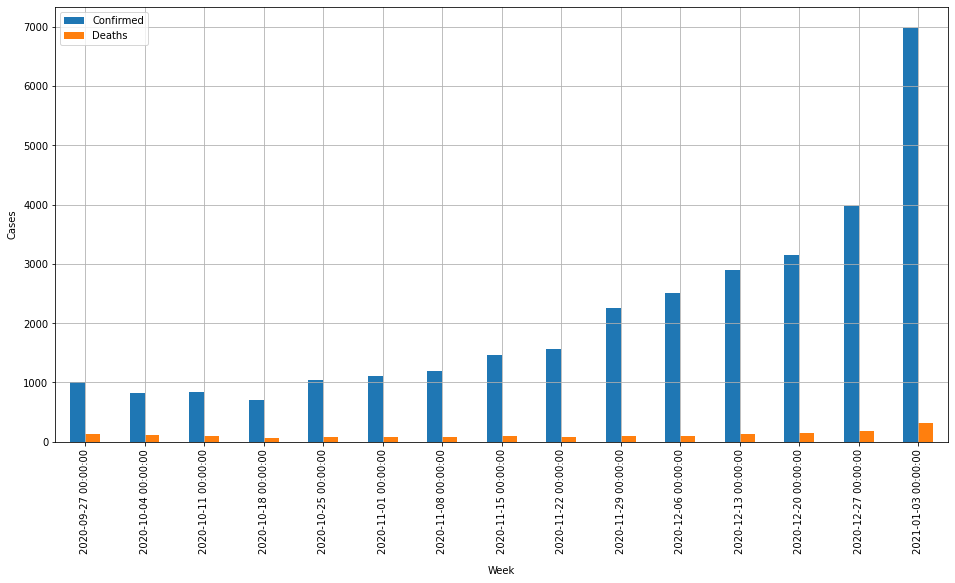

In [177]:
eg_ndf.loc['2020-09-21':'2020-12-31'][['Confirmed', 'Deaths']].resample('W').sum().plot(kind='bar', grid=True)
#plt.plot([0, 50, 100, 200, 500, 1000, 2000, 3000, 5000])
plt.xlabel("Week", labelpad=12)
plt.ylabel("Cases", labelpad=6)

In [178]:
print(eg_ndf.loc['2020-03-21':'2020-06-21'][['Confirmed', 'Deaths']].resample('W').sum())

            Confirmed  Deaths
Date                         
2020-03-29        184       8
2020-04-05        282      26
2020-04-12        494      35
2020-04-19        995      88
2020-04-26       1079      80
2020-05-03       1175      68
2020-05-10       2146     122
2020-05-17       2935      96
2020-05-24       2829     105
2020-05-31       5036     134
2020-06-07       7720     195
2020-06-14       9094     278
2020-06-21      10519     338


In [179]:
print(eg_ndf.loc['2020-06-21':'2020-09-21'][['Confirmed', 'Deaths']].resample('W').sum())

            Confirmed  Deaths
Date                         
2020-06-28      10635     618
2020-07-05       9955     596
2020-07-12      10065     554
2020-07-19       6817     515
2020-07-26       5705     444
2020-08-02       4287     304
2020-08-09       2421     259
2020-08-16       1009     144
2020-08-23        983     151
2020-08-30        762      83
2020-09-06       1490     156
2020-09-13       1136     131
2020-09-20       1146     118
2020-09-27       1006     122


In [180]:
print(eg_ndf.loc['2020-09-21':'2020-12-21'][['Confirmed', 'Deaths']].resample('W').sum())

            Confirmed  Deaths
Date                         
2020-09-27       1006     122
2020-10-04        825     113
2020-10-11        843      98
2020-10-18        704      59
2020-10-25       1037      80
2020-11-01       1116      79
2020-11-08       1196      79
2020-11-15       1465      90
2020-11-22       1566      85
2020-11-29       2260      95
2020-12-06       2514      88
2020-12-13       2891     135
2020-12-20       3143     149
2020-12-27       3980     178


In [181]:
print(eg_ndf.loc['2020-12-21':'2021-03-21'][['Confirmed', 'Deaths']].resample('W').sum())

            Confirmed  Deaths
Date                         
2020-12-27       3980     178
2021-01-03       6986     307
2021-01-10       9646     400
2021-01-17       7605     392


In [182]:
print(eg_ndf.loc['2020-03-01':'2021-03-31'][['Confirmed', 'Deaths']].resample('Q').sum())

            Confirmed  Deaths
Date                         
2020-03-31        575      36
2020-06-30      64612    2753
2020-09-30      37652    3094
2020-12-31      29701    1522
2021-03-31      17251     792


In [183]:
#weekly_state_eg = eg_ndf.loc['2020-03-01':'2020-12-31'][['Confirmed', 'Deaths']].resample('W').sum()

In [184]:
weekly_state_eg = pd.DataFrame(data=eg_ndf.loc['2020-03-01':'2020-12-31'][['Confirmed', 'Deaths']].resample('W').sum())

In [185]:
weekly_state_eg.describe()

,Confirmed,Deaths
count,44.000000,44.000000
mean,3012.272727,168.295455
std,3176.579558,158.992113
min,1.000000,0.000000
25%,992.000000,80.000000
50%,1477.500000,115.500000
75%,4056.750000,182.250000
max,10635.000000,618.000000


In [186]:
weekly_state_eg.head()

,Confirmed,Deaths
Date,,
2020-03-08,1,0
2020-03-15,47,1
2020-03-22,61,1
2020-03-29,184,8
2020-04-05,282,26


<AxesSubplot:xlabel='Date'>

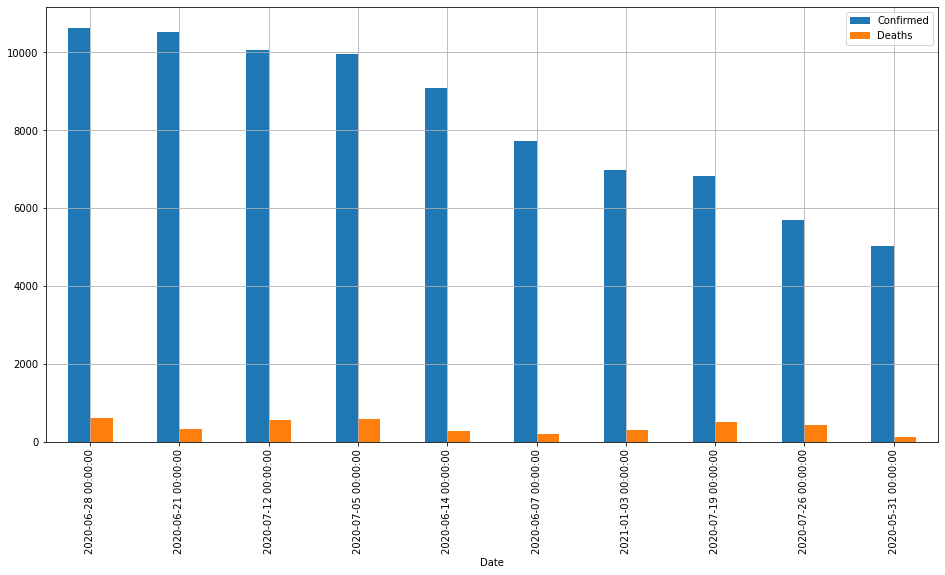

In [187]:
weekly_state_eg.nlargest(10,['Confirmed','Deaths']).plot(kind='bar', grid=True)

In [188]:
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv')

In [189]:
data.head(5)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
0,Afghanistan,AFG,Asia,38928341,cases,0,2020-01,NaN,0,"Epidemic intelligence, national weekly data"
1,Afghanistan,AFG,Asia,38928341,cases,0,2020-02,0.0,0,"Epidemic intelligence, national weekly data"
2,Afghanistan,AFG,Asia,38928341,cases,0,2020-03,0.0,0,"Epidemic intelligence, national weekly data"
3,Afghanistan,AFG,Asia,38928341,cases,0,2020-04,0.0,0,"Epidemic intelligence, national weekly data"
4,Afghanistan,AFG,Asia,38928341,cases,0,2020-05,0.0,0,"Epidemic intelligence, national weekly data"


In [190]:
data.tail(5)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
19767,Zimbabwe,ZWE,Africa,14862927,deaths,15,2020-49,1.547474,291,"Epidemic intelligence, national weekly data"
19768,Zimbabwe,ZWE,Africa,14862927,deaths,16,2020-50,2.085726,307,"Epidemic intelligence, national weekly data"
19769,Zimbabwe,ZWE,Africa,14862927,deaths,13,2020-51,1.951163,320,"Epidemic intelligence, national weekly data"
19770,Zimbabwe,ZWE,Africa,14862927,deaths,34,2020-52,3.162230,354,"Epidemic intelligence, national weekly data"
19771,Zimbabwe,ZWE,Africa,14862927,deaths,26,2020-53,4.036890,380,"Epidemic intelligence, national weekly data"


In [191]:
eg_data = data[data['country']=='Egypt'].reset_index()

In [192]:
eg_data.tail()

,index,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
101,5703,Egypt,EGY,Africa,102334403,deaths,135,2020-49,2.179130,6771,"Epidemic intelligence, national weekly data"
102,5704,Egypt,EGY,Africa,102334403,deaths,149,2020-50,2.775215,6920,"Epidemic intelligence, national weekly data"
103,5705,Egypt,EGY,Africa,102334403,deaths,178,2020-51,3.195406,7098,"Epidemic intelligence, national weekly data"
104,5706,Egypt,EGY,Africa,102334403,deaths,307,2020-52,4.739364,7405,"Epidemic intelligence, national weekly data"
105,5707,Egypt,EGY,Africa,102334403,deaths,400,2020-53,6.908723,7805,"Epidemic intelligence, national weekly data"
